#Import all necessary libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.cluster import KMeans
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import average_precision_score, precision_recall_curve, plot_precision_recall_curve
from sklearn.utils import resample, shuffle


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

Read the data into dataframe & EDA

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/creditcard.csv')
# Convert the time to different period in a day
df["Time"] = df["Time"].apply(lambda x : x / 3600 % 24)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,14.537951,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,5.847061,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,10.598194,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,15.010833,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,19.329722,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,23.999444,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


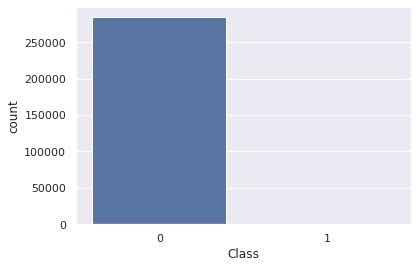

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(x="Class", data=df)

In [ ]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

# Data Preprocessing

In [ ]:
# Scale the independent variables
y = df["Class"].values  # target attributes
X = df.drop(["Class"], axis=1) # input attributes


x_scale = preprocessing.MinMaxScaler().fit_transform(X.values)



#Standard ML training and evaluation 

In [ ]:
# reduce the size of the data as it takes too long for training
reduce_x, large_x, reduce_y, large_y = train_test_split(x_scale, y,
                                                  test_size=0.2, stratify=y)

# data splitting
train_x, val_x, train_y, val_y = train_test_split(reduce_x, reduce_y,
                                                  test_size=0.4, stratify=reduce_y)


## Apply Resampling technique

In [ ]:
# resample the train data by rising the fraud sample
normal = train_x[train_y==0]
fraud = train_x[train_y==1]

print("Normal:",normal.shape)
print("Fraud:",fraud.shape)
print("Y shape:",train_y.shape)

Normal: (136471, 30)
Fraud: (236, 30)
Y shape: (136707,)


In [ ]:
# Increase the number of fraud to 20% of the normal
upsample_fraud = resample(fraud,
                          replace=True,
                          n_samples=int(normal.shape[0]/5))
print("Fraud upsample:",upsample_fraud.shape)
# Join the fraud upsample with normal
resample_data = np.concatenate((normal, upsample_fraud), axis=0)
print("Combine:",resample_data.shape)

Fraud upsample: (27294, 30)
Combine: (163765, 30)


In [ ]:
# join back fraud and normal data to train_x, train_y
train_x = resample_data
train_y = np.append(np.zeros(normal.shape[0]),np.ones(upsample_fraud.shape[0]))

train_x, train_y = shuffle(train_x,train_y,random_state = 0)
print("Y shape:",train_y.shape, "X shape", train_x.shape)

Y shape: (163765,) X shape (163765, 30)


## Supervised ML techniques

### DT

In [ ]:
# Decision Tree
DT_clf = DecisionTreeClassifier().fit(train_x, train_y)
# tree.plot_tree(DT_clf)

In [ ]:
# DT Performance Evaluation
pred_y_DT = DT_clf.predict(val_x)

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y_DT))

print ("")
print ("Confusion Matrix: \n", confusion_matrix(val_y, pred_y_DT, labels=[1,0]))
print ("Accuracy Score: ", accuracy_score(val_y, pred_y_DT))
precision = precision_score(val_y, pred_y_DT)
print ("Precision Score: ", precision)
recall = recall_score(val_y, pred_y_DT)
print ("Recall Score: ", recall)

print ("F1 Score: ", f1_score(val_y, pred_y_DT))
print ("ROC AUC: ", roc_auc_score(val_y, pred_y_DT))





Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     90980
           1       0.65      0.72      0.68       158

    accuracy                           1.00     91138
   macro avg       0.83      0.86      0.84     91138
weighted avg       1.00      1.00      1.00     91138


Confusion Matrix: 
 [[  113    45]
 [   60 90920]]
Accuracy Score:  0.998847900985319
Precision Score:  0.653179190751445
Recall Score:  0.7151898734177216
F1 Score:  0.6827794561933535
ROC AUC:  0.8572651939082452


### LR

In [ ]:
# Logistic regression
LR_clf = LogisticRegression(max_iter=10000).fit(train_x, train_y)


In [ ]:
# LR Performance Evaluation
pred_y_LR = LR_clf.predict(val_x)

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y_LR))

print ("")
print ("Confusion Matrix: \n", confusion_matrix(val_y, pred_y_LR, labels=[1,0]))
print ("Accuracy Score: ", accuracy_score(val_y, pred_y_LR))
precision = precision_score(val_y, pred_y_LR)
print ("Precision Score: ", precision)
recall = recall_score(val_y, pred_y_LR)
print ("Recall Score: ", recall)

print ("F1 Score: ", f1_score(val_y, pred_y_LR))
print ("ROC AUC: ", roc_auc_score(val_y, pred_y_LR))





Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     90980
           1       0.29      0.81      0.43       158

    accuracy                           1.00     91138
   macro avg       0.64      0.90      0.71     91138
weighted avg       1.00      1.00      1.00     91138


Confusion Matrix: 
 [[  128    30]
 [  316 90664]]
Accuracy Score:  0.9962035594373367
Precision Score:  0.2882882882882883
Recall Score:  0.810126582278481
F1 Score:  0.4252491694352159
ROC AUC:  0.9033266457226653


### SVM

In [ ]:
# Support Vector Machine
SVM_clf = svm.SVC().fit(train_x, train_y)


In [ ]:
# SVM Performance Evaluation
pred_y_SVM = SVM_clf.predict(val_x)

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y_SVM))

print ("")
print ("Confusion Matrix: \n", confusion_matrix(val_y, pred_y_SVM, labels=[1,0]))
print ("Accuracy Score: ", accuracy_score(val_y, pred_y_SVM))
precision = precision_score(val_y, pred_y_SVM)
print ("Precision Score: ", precision)
recall = recall_score(val_y, pred_y_SVM)
print ("Recall Score: ", recall)

print ("F1 Score: ", f1_score(val_y, pred_y_SVM))
print ("ROC AUC: ", roc_auc_score(val_y, pred_y_SVM))




Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     90980
           1       0.53      0.81      0.64       158

    accuracy                           1.00     91138
   macro avg       0.76      0.90      0.82     91138
weighted avg       1.00      1.00      1.00     91138


Confusion Matrix: 
 [[  128    30]
 [  115 90865]]
Accuracy Score:  0.9984090061225833
Precision Score:  0.5267489711934157
Recall Score:  0.810126582278481
F1 Score:  0.6384039900249376
ROC AUC:  0.9044312841047273


### KNN

In [ ]:
# K Nearest Neighbors
KNN_clf = KNeighborsClassifier(n_neighbors=3).fit(train_x, train_y)

In [ ]:
# KNN Performance Evaluation
pred_y_KNN = KNN_clf.predict(val_x)

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y_KNN))

print ("")
print ("Confusion Matrix: \n", confusion_matrix(val_y, pred_y_KNN, labels=[1,0]))
print ("Accuracy Score: ", accuracy_score(val_y, pred_y_KNN))
precision = precision_score(val_y, pred_y_KNN)
print ("Precision Score: ", precision)
recall = recall_score(val_y, pred_y_KNN)
print ("Recall Score: ", recall)

print ("F1 Score: ", f1_score(val_y, pred_y_KNN))
print ("ROC AUC: ", roc_auc_score(val_y, pred_y_KNN))




Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     90980
           1       0.75      0.73      0.74       158

    accuracy                           1.00     91138
   macro avg       0.88      0.87      0.87     91138
weighted avg       1.00      1.00      1.00     91138


Confusion Matrix: 
 [[  116    42]
 [   38 90942]]
Accuracy Score:  0.9991222102745287
Precision Score:  0.7532467532467533
Recall Score:  0.7341772151898734
F1 Score:  0.7435897435897437
ROC AUC:  0.8668797704878802


### RF

In [ ]:
# Random Forrest
RF_clf = RandomForestClassifier().fit(train_x, train_y)

In [ ]:
# RF Performance Evaluation
pred_y_RF = RF_clf.predict(val_x)

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y_RF))

print ("")
print ("Confusion Matrix: \n", confusion_matrix(val_y, pred_y_RF, labels=[1,0]))
print ("Accuracy Score: ", accuracy_score(val_y, pred_y_RF))
precision = precision_score(val_y, pred_y_RF)
print ("Precision Score: ", precision)
recall = recall_score(val_y, pred_y_RF)
print ("Recall Score: ", recall)

print ("F1 Score: ", f1_score(val_y, pred_y_RF))
print ("ROC AUC: ", roc_auc_score(val_y, pred_y_RF))




Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     90980
           1       0.90      0.75      0.82       158

    accuracy                           1.00     91138
   macro avg       0.95      0.87      0.91     91138
weighted avg       1.00      1.00      1.00     91138


Confusion Matrix: 
 [[  118    40]
 [   13 90967]]
Accuracy Score:  0.9994184643068753
Precision Score:  0.9007633587786259
Recall Score:  0.7468354430379747
F1 Score:  0.8166089965397924
ROC AUC:  0.8733462772455207


## Unsupervised ML techniques

### K means

In [ ]:
## K means
Kmeans_clf = KMeans().fit(train_x)

In [ ]:
# Predict the top 3% farthest points from center as anomaly
clusters_y_Kmeans = Kmeans_clf.predict(val_x)

clusters_centers=Kmeans_clf.cluster_centers_
dist = [np.linalg.norm(x-y) for x,y in zip(val_x,clusters_centers[clusters_y_Kmeans])]

pred_y_Kmeans=np.array(dist)
pred_y_Kmeans[dist>=np.percentile(dist,97)]=1
pred_y_Kmeans[dist<np.percentile(dist,97)]=0

# Kmeans Performance Evaluation

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y_Kmeans))

print ("")
print ("Confusion Matrix: \n", confusion_matrix(val_y, pred_y_Kmeans, labels=[1,0]))
print ("Accuracy Score: ", accuracy_score(val_y, pred_y_Kmeans))
precision = precision_score(val_y, pred_y_Kmeans)
print ("Precision Score: ", precision)
recall = recall_score(val_y, pred_y_Kmeans)
print ("Recall Score: ", recall)

print ("F1 Score: ", f1_score(val_y, pred_y_Kmeans))
print ("ROC AUC: ", roc_auc_score(val_y, pred_y_Kmeans))




Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     90980
           1       0.03      0.49      0.05       158

    accuracy                           0.97     91138
   macro avg       0.51      0.73      0.52     91138
weighted avg       1.00      0.97      0.98     91138


Confusion Matrix: 
 [[   77    81]
 [ 2658 88322]]
Accuracy Score:  0.9699466742741776
Precision Score:  0.028153564899451554
Recall Score:  0.4873417721518987
F1 Score:  0.053231939163498096
ROC AUC:  0.7290632800086818


### OCSVM

In [ ]:
## One-Class SVM
OCSVM_clf = OneClassSVM(gamma='auto', nu=0.1).fit(train_x[train_y==0])

In [ ]:
# convert from class -1 1 to 1 0
pred_y_OCSVM = OCSVM_clf.predict(val_x)
pred_y_OCSVM [pred_y_OCSVM ==1] = 0
pred_y_OCSVM [pred_y_OCSVM ==-1] = 1

# One-Class SVM Performance Evaluation

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y_OCSVM))

print ("")
print ("Confusion Matrix: \n", confusion_matrix(val_y, pred_y_OCSVM, labels=[1,0]))
print ("Accuracy Score: ", accuracy_score(val_y, pred_y_OCSVM))
precision = precision_score(val_y, pred_y_OCSVM)
print ("Precision Score: ", precision)
recall = recall_score(val_y, pred_y_OCSVM)
print ("Recall Score: ", recall)

print ("F1 Score: ", f1_score(val_y, pred_y_OCSVM))
print ("ROC AUC: ", roc_auc_score(val_y, pred_y_OCSVM))




Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     90980
           1       0.01      0.71      0.02       158

    accuracy                           0.90     91138
   macro avg       0.51      0.80      0.48     91138
weighted avg       1.00      0.90      0.94     91138


Confusion Matrix: 
 [[  112    46]
 [ 9232 81748]]
Accuracy Score:  0.8981983365884703
Precision Score:  0.011986301369863013
Recall Score:  0.7088607594936709
F1 Score:  0.023573984424331722
ROC AUC:  0.8036939541587942


### Isolation Forest

In [ ]:
## Isolation Forest
IsoF_clf = IsolationForest().fit(train_x[train_y==0])

In [ ]:
# convert from class -1 1 to 1 0
pred_y_IsoF = IsoF_clf.predict(val_x)
pred_y_IsoF [pred_y_IsoF ==1] = 0
pred_y_IsoF [pred_y_IsoF ==-1] = 1

# Isolation Forest Performance Evaluation

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y_IsoF))

print ("")
print ("Confusion Matrix: \n", confusion_matrix(val_y, pred_y_IsoF, labels=[1,0]))
print ("Accuracy Score: ", accuracy_score(val_y, pred_y_IsoF))
precision = precision_score(val_y, pred_y_IsoF)
print ("Precision Score: ", precision)
recall = recall_score(val_y, pred_y_IsoF)
print ("Recall Score: ", recall)

print ("F1 Score: ", f1_score(val_y, pred_y_IsoF))
print ("ROC AUC: ", roc_auc_score(val_y, pred_y_IsoF))




Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     90980
           1       0.04      0.78      0.07       158

    accuracy                           0.96     91138
   macro avg       0.52      0.87      0.53     91138
weighted avg       1.00      0.96      0.98     91138


Confusion Matrix: 
 [[  124    34]
 [ 3178 87802]]
Accuracy Score:  0.9647567425223288
Precision Score:  0.03755299818291944
Recall Score:  0.7848101265822784
F1 Score:  0.07167630057803467
ROC AUC:  0.8749396862852038


## Hybrid Model

### RF --> Isolation Forest (supervised then unsupervised)

In [ ]:
# those instance predicted as normal by rf will go through
# 2nd prediction by using isolation forest


pred_y_RF_IsoF = IsoF_clf.predict(val_x[pred_y_RF==0])
pred_y_RF_IsoF [pred_y_RF_IsoF ==1] = 0
pred_y_RF_IsoF [pred_y_RF_IsoF ==-1] = 1


pred_y_RF[pred_y_RF==0] = pred_y_RF_IsoF


In [ ]:
# RF_IsoF Performance Evaluation

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y_RF))

print ("")
print ("Confusion Matrix: \n", confusion_matrix(val_y, pred_y_RF, labels=[1,0]))
print ("Accuracy Score: ", accuracy_score(val_y, pred_y_RF))
precision = precision_score(val_y, pred_y_RF)
print ("Precision Score: ", precision)
recall = recall_score(val_y, pred_y_RF)
print ("Recall Score: ", recall)

print ("F1 Score: ", f1_score(val_y, pred_y_RF))
print ("ROC AUC: ", roc_auc_score(val_y, pred_y_RF))



Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     90980
           1       0.04      0.83      0.08       158

    accuracy                           0.96     91138
   macro avg       0.52      0.90      0.53     91138
weighted avg       1.00      0.96      0.98     91138


Confusion Matrix: 
 [[  131    27]
 [ 3178 87802]]
Accuracy Score:  0.9648335491233075
Precision Score:  0.0395889996977939
Recall Score:  0.8291139240506329
F1 Score:  0.07556965676377272
ROC AUC:  0.8970915850193811


### KNN --> Isof (supervised then unsupervised)

In [ ]:
# those instance predicted as normal by knn will go through
# 2nd prediction by using isolation forest

pred_y_KNN_IsoF = IsoF_clf.predict(val_x[pred_y_KNN==0])
pred_y_KNN_IsoF [pred_y_KNN_IsoF ==1] = 0
pred_y_KNN_IsoF [pred_y_KNN_IsoF ==-1] = 1


pred_y_KNN[pred_y_KNN==0] = pred_y_KNN_IsoF

      

In [ ]:
# KNN_IsoF Performance Evaluation

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y_KNN))

print ("")
print ("Confusion Matrix: \n", confusion_matrix(val_y, pred_y_KNN, labels=[1,0]))
print ("Accuracy Score: ", accuracy_score(val_y, pred_y_KNN))
precision = precision_score(val_y, pred_y_KNN)
print ("Precision Score: ", precision)
recall = recall_score(val_y, pred_y_KNN)
print ("Recall Score: ", recall)

print ("F1 Score: ", f1_score(val_y, pred_y_KNN))
print ("ROC AUC: ", roc_auc_score(val_y, pred_y_KNN))


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     90980
           1       0.04      0.82      0.07       158

    accuracy                           0.96     91138
   macro avg       0.52      0.89      0.53     91138
weighted avg       1.00      0.96      0.98     91138


Confusion Matrix: 
 [[  130    28]
 [ 3197 87783]]
Accuracy Score:  0.9646141016919397
Precision Score:  0.03907424105801022
Recall Score:  0.8227848101265823
F1 Score:  0.07460545193687232
ROC AUC:  0.8938226095038274


### IsoF --> RF (unsupervised then supervised)

In [ ]:
# those instance predicted as fraud by IsoF will go through
# 2nd prediction by using rf

pred_y_IsoF_RF = pred_y_IsoF.copy()

pred_y_IsoF_RF[pred_y_IsoF_RF==1] = RF_clf.predict(val_x[pred_y_IsoF_RF==1])



In [ ]:
# IsoF_RF Performance Evaluation

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y_IsoF_RF))

print ("")
print ("Confusion Matrix: \n", confusion_matrix(val_y, pred_y_IsoF_RF, labels=[1,0]))
print ("Accuracy Score: ", accuracy_score(val_y, pred_y_IsoF_RF))
precision = precision_score(val_y, pred_y_IsoF_RF)
print ("Precision Score: ", precision)
recall = recall_score(val_y, pred_y_IsoF_RF)
print ("Recall Score: ", recall)

print ("F1 Score: ", f1_score(val_y, pred_y_IsoF_RF))
print ("ROC AUC: ", roc_auc_score(val_y, pred_y_IsoF_RF))


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     90980
           1       0.90      0.70      0.79       158

    accuracy                           1.00     91138
   macro avg       0.95      0.85      0.89     91138
weighted avg       1.00      1.00      1.00     91138


Confusion Matrix: 
 [[  111    47]
 [   13 90967]]
Accuracy Score:  0.9993416577058966
Precision Score:  0.8951612903225806
Recall Score:  0.7025316455696202
F1 Score:  0.7872340425531914
ROC AUC:  0.8511943785113434


### IsoF --> KNN (unsupervised then supervised)

In [ ]:
# those instance predicted as fraud by IsoF will go through
# 2nd prediction by using knn

pred_y_IsoF_KNN = pred_y_IsoF.copy()

pred_y_IsoF_KNN[pred_y_IsoF_KNN==1] = KNN_clf.predict(val_x[pred_y_IsoF_KNN==1])

In [ ]:
# IsoF_KNN Performance Evaluation

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y_IsoF_KNN))

print ("")
print ("Confusion Matrix: \n", confusion_matrix(val_y, pred_y_IsoF_KNN, labels=[1,0]))
print ("Accuracy Score: ", accuracy_score(val_y, pred_y_IsoF_KNN))
precision = precision_score(val_y, pred_y_IsoF_KNN)
print ("Precision Score: ", precision)
recall = recall_score(val_y, pred_y_IsoF_KNN)
print ("Recall Score: ", recall)

print ("F1 Score: ", f1_score(val_y, pred_y_IsoF_KNN))
print ("ROC AUC: ", roc_auc_score(val_y, pred_y_IsoF_KNN))


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     90980
           1       0.85      0.70      0.77       158

    accuracy                           1.00     91138
   macro avg       0.93      0.85      0.88     91138
weighted avg       1.00      1.00      1.00     91138


Confusion Matrix: 
 [[  110    48]
 [   19 90961]]
Accuracy Score:  0.9992648511049178
Precision Score:  0.8527131782945736
Recall Score:  0.6962025316455697
F1 Score:  0.7665505226480838
ROC AUC:  0.8479968472692566


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
